In [1]:
import os
import sys
import datetime

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleSkyPyLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

In [2]:
dir = os.path.join(array_dir, 'sample_skypy_lens')

load all

In [3]:
grid_oversample = [1, 3, 5]
num_samples = [100, 1000, 10000, 100000, 1000000, 10000000]

ideal = np.load(os.path.join(dir, 'sample_skypy_lens_5_10000000.npy'))

all_files = glob(dir + '/sample_skypy_lens_*.npy')
grid_1 = [np.load(i) for i in all_files if '_1_' in i]
grid_3 = [np.load(i) for i in all_files if '_3_' in i]
grid_5 = [np.load(i) for i in all_files if '_5_' in i]

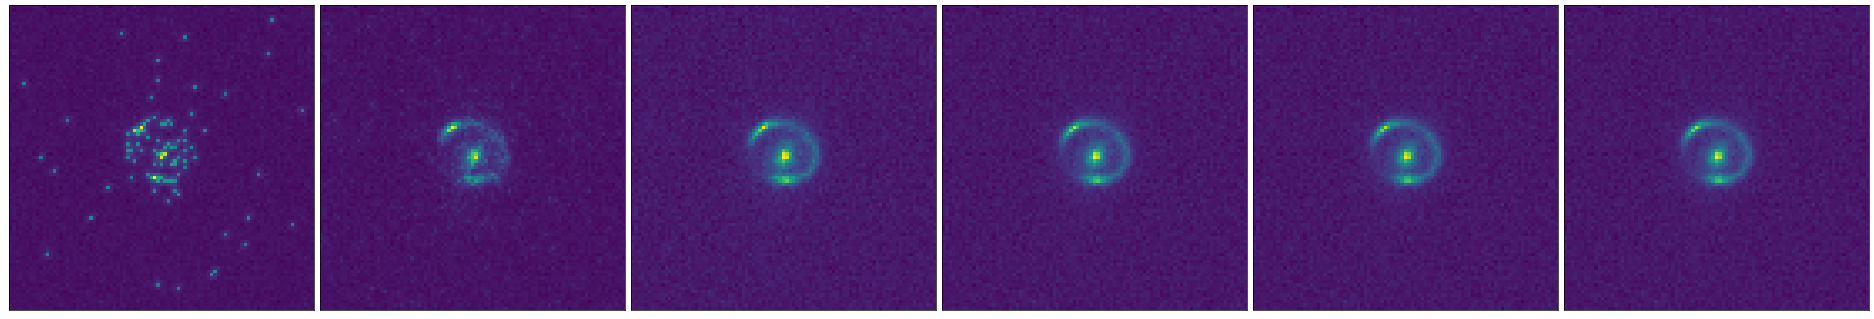

In [11]:
plot.plot_list(grid_1)

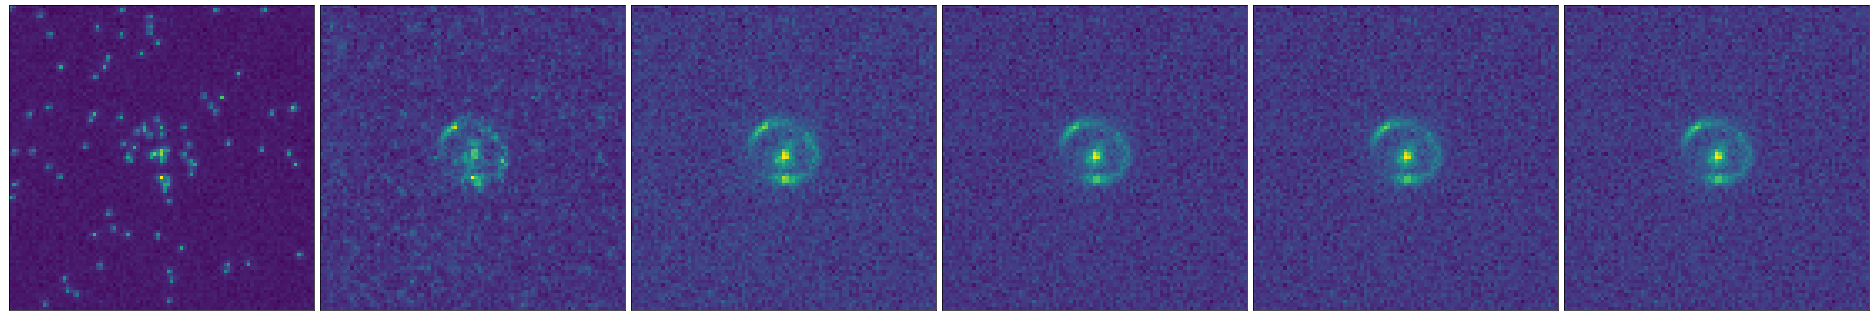

In [12]:
plot.plot_list(grid_3)

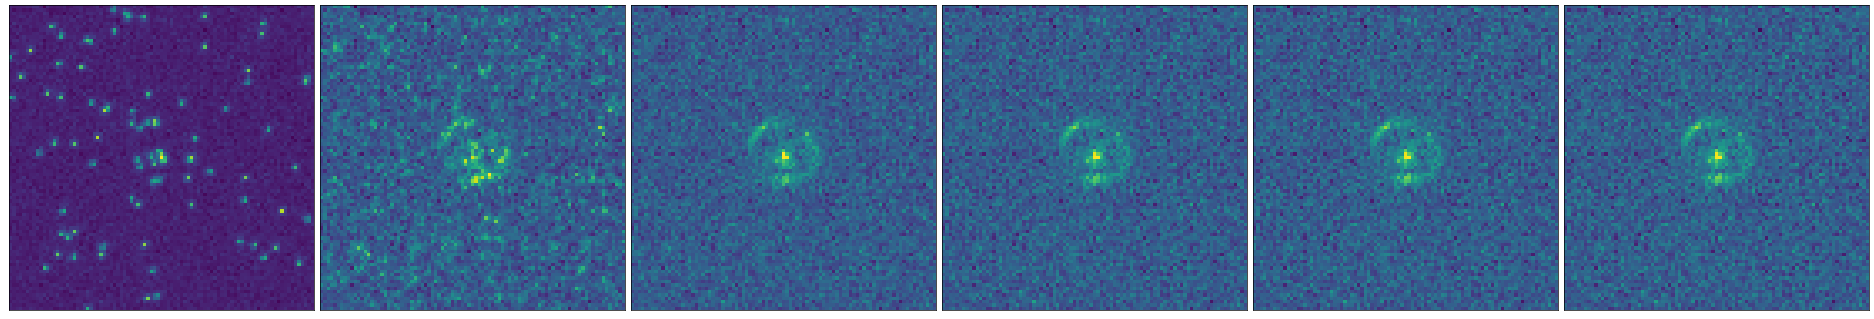

In [13]:
plot.plot_list(grid_5)

get $\chi^2$

In [4]:
chi_squared_1 = [stats.chi_square(i, ideal) for i in grid_1]
chi_squared_3 = [stats.chi_square(i, ideal) for i in grid_3]
chi_squared_5 = [stats.chi_square(i, ideal) for i in grid_5]

chi_squared = np.concatenate([chi_squared_1, chi_squared_3, chi_squared_5])

print(chi_squared_1)
print(chi_squared_3)
print(chi_squared_5)

[-3225.7505549755915, 242.85821489527365, 167.34215545233025, 206.9125735393202, 201.5502033449618, 203.08505192112358]
[459.2007723327682, 75.48070747100657, 13.660115866796685, 6.558299600292804, 10.248992506578283, 10.707868150371931]
[-9371.510730972246, 28.364204589964956, -4.193743407151455, -0.7425176036863813, 0.06678698692429318, 0.0]


In [5]:
# print(len(num_samples))
# print(len(chi_squared_1), len(chi_squared_3), len(chi_squared_5))

In [7]:
execution_time_1 = np.load(os.path.join(dir, 'execution_time_1.npy'))
execution_time_3 = np.load(os.path.join(dir, 'execution_time_3.npy'))
execution_time_5 = np.load(os.path.join(dir, 'execution_time_5.npy'))

execution_time_x_1 = np.load(os.path.join(dir, 'execution_time_x_1.npy'))
execution_time_x_3 = np.load(os.path.join(dir, 'execution_time_x_3.npy'))
execution_time_x_5 = np.load(os.path.join(dir, 'execution_time_x_5.npy'))

print(execution_time_x_1)
print(execution_time_1)

[[       1      100]
 [       1     1000]
 [       1    10000]
 [       1   100000]
 [       1  1000000]
 [       1 10000000]]
[  46.2125957   118.45105457  457.43787813 1226.76422286 1423.6265614
 1452.61514282]


In [8]:
execution_time_1 = [str(datetime.timedelta(seconds=round(i))) for i in execution_time_1]
execution_time_3 = [str(datetime.timedelta(seconds=round(i))) for i in execution_time_3]
execution_time_5 = [str(datetime.timedelta(seconds=round(i))) for i in execution_time_5]

In [9]:
print(execution_time_1)

['0:00:46', '0:01:58', '0:07:37', '0:20:27', '0:23:44', '0:24:13']


NameError: name 'execution_time' is not defined

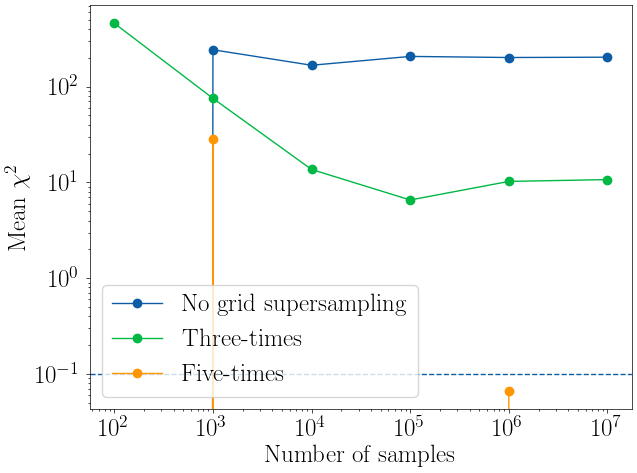

In [10]:
f, ax = plt.subplots()  # figsize=(10,10)

ax.plot(num_samples, chi_squared_1, linestyle='-', marker='o', label='No grid supersampling')
ax.plot(num_samples, chi_squared_3, linestyle='-', marker='o', label='Three-times')
ax.plot(num_samples[:-1], chi_squared_5[:-1], linestyle='-', marker='o', label='Five-times')
plt.axhline(y=0.1, linestyle='--')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Mean $\chi^2$')

for i, txt in enumerate(execution_time):
    ax.annotate(txt, (num_samples[i], chi_squared[i]))

plt.savefig(os.path.join(figure_dir, 'calc_params.png'))
plt.show()